#### consider your evaluation metrics
#### consider your baseline score
#### how can your model be used for inference?
#### why do you believe your model will generalize to new data

In [64]:
# Importing necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics

%matplotlib inline

# Reading Data from CSV to DF
df_train_data_out = pd.read_csv("data/train.csv")
df_test_data = pd.read_csv("data/test.csv")

### First we want to inspect the data and see  what is the Percentage of None values of ever column
#### below is a function that takes a dataframe and rutern the Percentage  

In [65]:
# A function that prints the top columns with missing NaN count and percent
def print_nan_percentage(df_to_print):
    # Getting the sum of missing values from DF Sorted in descending order
    nan_count = df_to_print.isnull().sum().sort_values(ascending=False)
    # Dividing the NaN sum with coulmn length to get a percentage 
    nan_percentage = nan_count / len(df_to_print)
    # Returning the top 20 columns with missing NaNs
    return pd.DataFrame(data=[nan_count, nan_percentage],index=['nan_count', 'nan_percentage']).T.head(20)

#### Lets see the results

- Train DataFrame

In [66]:
print_nan_percentage(df_train_data_out)

,nan_count,nan_percentage
PoolQC,1453.0,0.995205
MiscFeature,1406.0,0.963014
Alley,1369.0,0.937671
Fence,1179.0,0.807534
FireplaceQu,690.0,0.472603
LotFrontage,259.0,0.177397
GarageCond,81.0,0.055479
GarageType,81.0,0.055479
GarageYrBlt,81.0,0.055479
GarageFinish,81.0,0.055479


- Test DataFrmae

In [67]:
print_nan_percentage(df_test_data)

,nan_count,nan_percentage
PoolQC,1456.0,0.997944
MiscFeature,1408.0,0.965045
Alley,1352.0,0.926662
Fence,1169.0,0.801234
FireplaceQu,730.0,0.500343
LotFrontage,227.0,0.155586
GarageCond,78.0,0.053461
GarageQual,78.0,0.053461
GarageYrBlt,78.0,0.053461
GarageFinish,78.0,0.053461


- We noticed that the data contains a lot of missing NaN values.
- We will have to take a closer look at some of the columns and perform some data cleaning.

# Let's start by taking taking a quick look at the statistics of each column

In [68]:
df_train_data_out.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [69]:
df_test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


# We noticed a connection between the ID columns from the train and test DFs

- We can see that the train DF starts from ID 1 and ends at ID 1460.
- While the test DF start from 1461 and end at 2919.

In [70]:
# Set index in both DFs to be the Id column since the Id between the two DFs are connected 
# Train end at 1459 and test start from 1460
df_test_data.set_index('Id')
df_train_data_out.set_index('Id')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


# HeatMap of missing null values 

- As we clearly see from the heatmap there are many missing values of features in both train dataframe and test dataframe.
- We can see that that the train & test DFs share a lot o missing values in the PoolQC, Alley, MSZoning and Fireplaces columns
- While the rest of the columns with missing values sugest that there might be a difference in the categories in which the columns are filled with

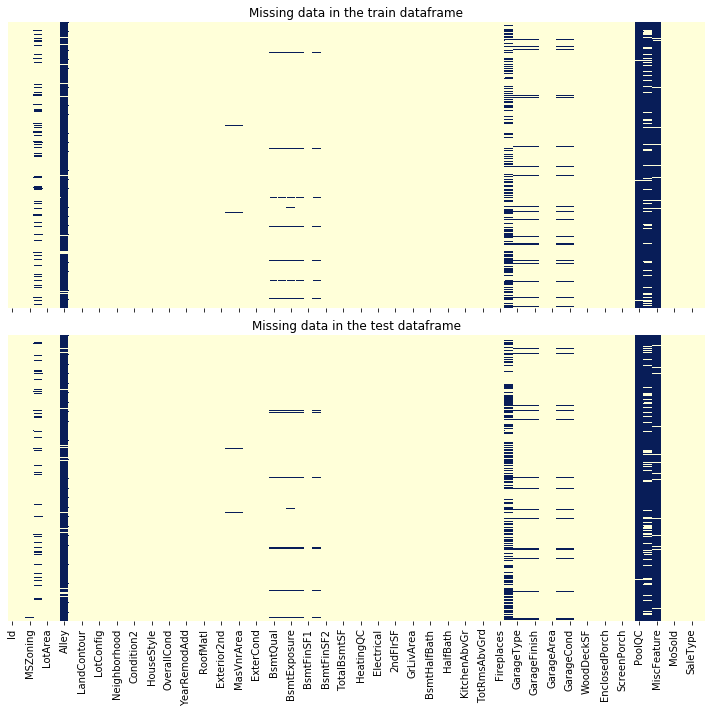

In [71]:
#Set the default subplots number of rows,number of columns and figure size,:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 10),  sharex=True)

# train data 
sns.heatmap(df_train_data_out.isnull(), yticklabels=False, ax = ax[0],cbar=False, cmap='YlGnBu')
# Set the heatmap title
ax[0].set_title('Missing data in the train dataframe')

# test data
sns.heatmap(df_test_data.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='YlGnBu')
# Set the heatmap title
ax[1].set_title('Missing data in the test dataframe');
plt.tight_layout()

# Let's investigate some of the categorical columns

In [72]:
print('MSZoning: ', df_train_data_out['MSZoning'].unique())
print('\nMSSubClass: ', df_train_data_out['MSSubClass'].unique())
print('\nPoolQC: ', df_train_data_out['PoolQC'].unique())
print('\nUtilities: ', df_train_data_out['Utilities'].unique())

MSZoning:  ['RL' 'RM' 'C (all)' 'FV' 'RH']

MSSubClass:  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]

PoolQC:  [nan 'Ex' 'Fa' 'Gd']

Utilities:  ['AllPub' 'NoSeWa']


In [73]:
print('MSZoning: ', df_test_data['MSZoning'].unique())
print('\nMSSubClass: ', df_test_data['MSSubClass'].unique())
print('\nPoolQC: ', df_test_data['PoolQC'].unique())
print('\nUtilities: ', df_test_data['Utilities'].unique())

MSZoning:  ['RH' 'RL' 'RM' 'FV' 'C (all)' nan]

MSSubClass:  [ 20  60 120 160  80  30  50  90  85 190  45  70  75 180  40 150]

PoolQC:  [nan 'Ex' 'Gd']

Utilities:  ['AllPub' nan]


- After looking at the data descriptions, we noticed the following:
    - Some columns in the Train DF contain Certain categories, while the Test DF contain a different set of categories 
    - We also noticed that NaN values in some columns represent NA category, while in other it was simply missing data
    - As a result, these columns will have to be filled appropriately based on what is provided in the data description

# Before we start filling columns, we would like to look at the data for outliers

- We will start by looking at the columns with the highest correlation with our Traget, in this case the SalePrice

In [74]:
#Correlation with output variable
df_corr = df_train_data_out.corr()
cor_target = abs(df_corr["SalePrice"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

- We will plot using SNS pairplot to check for any noticable outliers

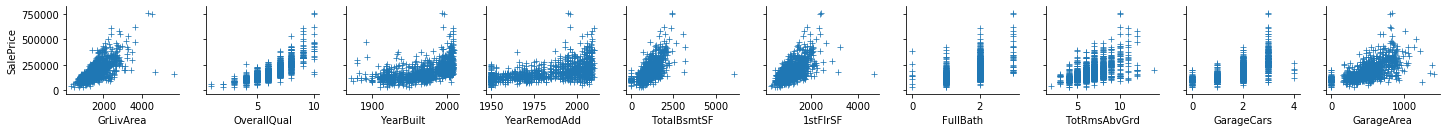

In [75]:
# Plotting the best correlated features with SalePrice using pair plot
sns.pairplot(df_train_data_out,height=2, x_vars=['GrLivArea',
                                             'OverallQual',
                                             'YearBuilt',
                                             'YearRemodAdd',
                                             'TotalBsmtSF',
                                             '1stFlrSF',
                                             'FullBath',
                                             'TotRmsAbvGrd',
                                             'GarageCars',
                                             'GarageArea'], y_vars='SalePrice', markers=['+'])

- From the pairplots we noticed that there are outlier points for the features (GrLivArea, TotalBsmtSF and 1stFlrSF)

# Relation exploration for some features

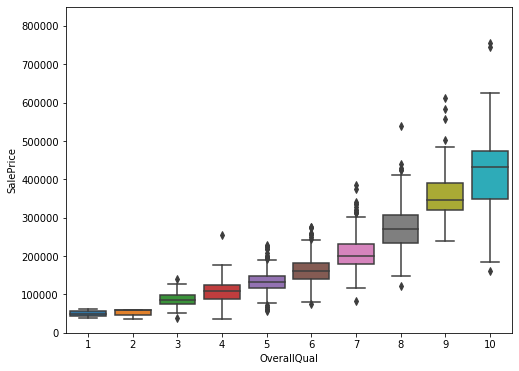

In [76]:
#box plot overallqual/saleprice
data = pd.concat([df_train_data_out['SalePrice'], df_train_data_out['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=850000);

- The Overall quality for the house positively correlates with the house price, as the quality increase the price of the house increases

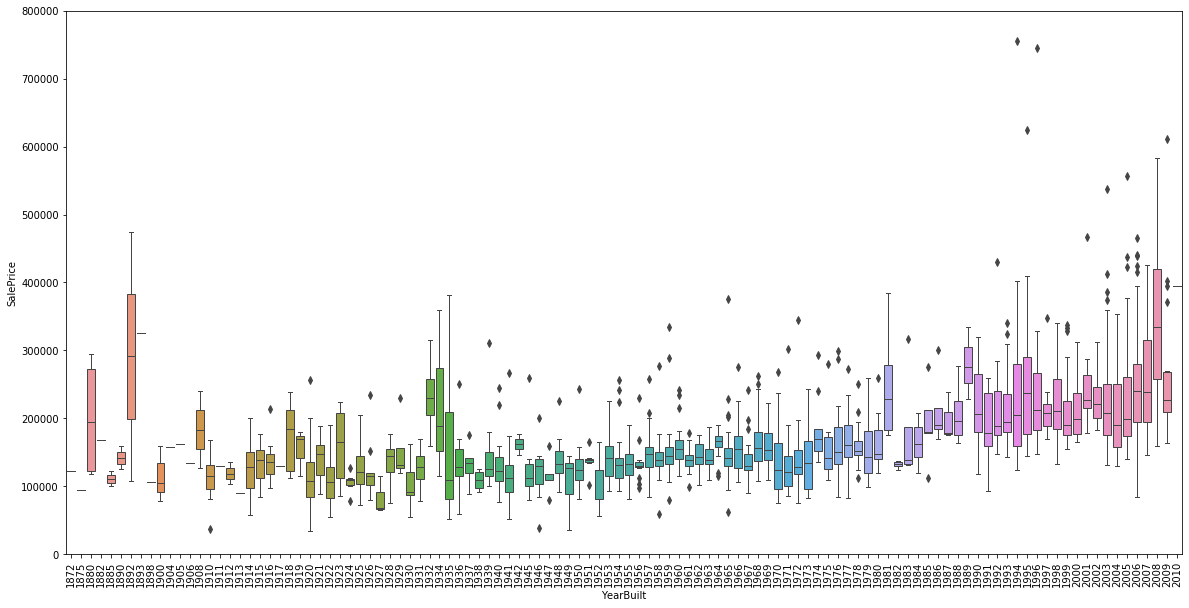

In [77]:
#box plot YearBuilt/saleprice
data = pd.concat([df_train_data_out['SalePrice'], df_train_data_out['YearBuilt']], axis=1)
fig, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x='YearBuilt', y='SalePrice', data=data, linewidth=1)
plt.xticks(rotation=90);
fig.axis(ymin=0, ymax=800000);

### so we try to see the price and the year to check the outlier and how the prise go with the year 

# Let's drop the outliers for GRLivArea, TotalBsmtSF and 1stFlrSF

In [78]:
# Dropping outliers from train DF for column GrLivArea
df_train_data = df_train_data_out[(df_train_data_out['GrLivArea'] <= 4000)]
df_train_data.reset_index(drop=True)
df_train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


- By looking at the GRLiveArea & 1stFlrSF, we can see that noticable outliers are now gone

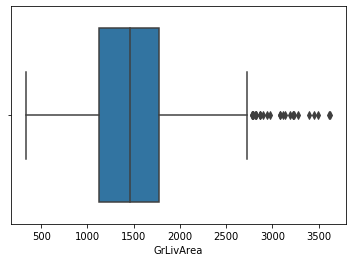

In [79]:
gr=sns.boxplot(x=df_train_data['GrLivArea'])

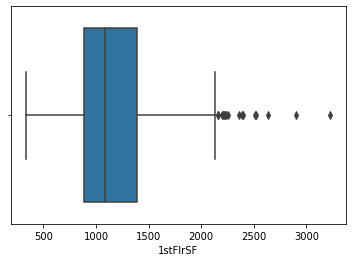

In [80]:
gr=sns.boxplot(x=df_train_data['1stFlrSF'])

# Now we will split our train data to X & y (target)

In [81]:
# Getting the SalePrice in a target column
y = df_train_data['SalePrice']

In [82]:
# Dropping SalePrice from train DF(
df_train_data.drop('SalePrice',axis=1 ,inplace= True)

/Users/ghalib/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Now we will merger the train & test DFs

In [83]:
# Merging both train and test DF and preparing for data cleaning 
data_merge = pd.merge(df_train_data ,df_test_data,how='outer',left_index=False, right_index=False)

In [84]:
# Checking that the merge done appropriately 
data_merge.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# We are almost there, now we will fill our NaN values accordingly 

- Categorical columns with actual missing values will be filled with the mode of the column
- Numerical columns with numbers that are not; for example, years, will ne filled with the median of the column
- Lastly, The reset of the columns with NaN and are legitimate NA categories will be filled with NA

In [85]:
# Replace NaNs with 0 for garage year built
data_merge['GarageYrBlt'].fillna(0, inplace=True)

# For garages with no built year, assume that it was built in the same year as the house 
fixed_garage = [j if i == 0 else i for i,j in zip(data_merge['GarageYrBlt'], data_merge['YearBuilt'])]
    
# Assigne new replaced zero values to the garage year built
data_merge['GarageYrBlt'] = fixed_garage

In [22]:
# Getting the columns that should be filled using the most common category in the column
col_mode_fill = ['MSZoning', 'Utilities', 'Exterior1st', 'MasVnrType', 'BsmtQual', 'KitchenQual', 
                 'Functional', 'Electrical']
# Filling the category columns with the mode of the column
data_merge.update(data_merge[col_mode_fill].fillna(df_train_data[col_mode_fill].mode(), inplace=True))
data_merge[col_mode_fill].head(100)

D:\anaconda\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,MSZoning,Utilities,Exterior1st,MasVnrType,BsmtQual,KitchenQual,Functional,Electrical
0,RL,AllPub,VinylSd,BrkFace,Gd,Gd,Typ,SBrkr
1,RL,AllPub,MetalSd,None,Gd,TA,Typ,SBrkr
2,RL,AllPub,VinylSd,BrkFace,Gd,Gd,Typ,SBrkr
3,RL,AllPub,Wd Sdng,None,TA,Gd,Typ,SBrkr
4,RL,AllPub,VinylSd,BrkFace,Gd,Gd,Typ,SBrkr
...,...,...,...,...,...,...,...,...
95,RL,AllPub,VinylSd,BrkFace,Gd,TA,Typ,SBrkr
96,RL,AllPub,VinylSd,BrkFace,Gd,Gd,Typ,SBrkr
97,RL,AllPub,HdBoard,BrkFace,TA,TA,Typ,FuseF
98,RL,AllPub,Wd Sdng,None,TA,TA,Typ,SBrkr


In [23]:
# Fill NaN values with NA for object columns that were not filled with mode,
# and fill floats with medain
data_merge = data_merge.apply(lambda x: x.fillna('NA') if x.dtype.kind in 'O' else x.fillna(x[:1457].median()) 
                               if x.dtype.kind in 'f' else x)
data_merge.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,12,2008,WD,Normal


- Check our data after filling and make sure there are now missing data

In [24]:
# Display train info to check that data does not have any more NaN values
print_nan_percentage(data_merge)

,nan_count,nan_percentage
SaleCondition,0.0,0.0
SaleType,0.0,0.0
RoofStyle,0.0,0.0
RoofMatl,0.0,0.0
Exterior1st,0.0,0.0
Exterior2nd,0.0,0.0
MasVnrType,0.0,0.0
MasVnrArea,0.0,0.0
ExterQual,0.0,0.0
ExterCond,0.0,0.0


# HeatMap After Cleaning Data

- Using the same heatmap above for NaNs, we can see that all NaN values are now gone

Text(0.5, 1, 'Missing data in merged dataframe')

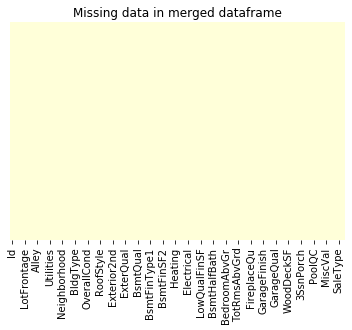

In [25]:
# Creating a heatmap for Merged Data 
sns.heatmap(data_merge.isnull(), yticklabels=False,cbar=False, cmap='YlGnBu')
# Set the heatmap title
plt.title('Missing data in merged dataframe')


# In this step we will convert our data to dummy variables

- This step is done to convert categorical columns to numerical ones, which will be needed in performing training on our models and preducing predictions for the test data in the last step  
- We will do this step with the merged data becasue some categories in the test DF are not in the train DF and vice versa
- As a result, we might have a mismatch in shapes if this step was done seperatly for the two DFs\

In [27]:
# Convert categorical variable into dummy/indicator variables.
dt_me_dumy = pd.get_dummies(data_merge, drop_first=True)

In [28]:
dt_me_dumy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2915 entries, 0 to 2914
Columns: 268 entries, Id to SaleCondition_Partial
dtypes: float64(11), int64(26), uint8(231)
memory usage: 1.6 MB


- We will split the DF based on ID for Train 

In [29]:
train_cleaned = dt_me_dumy[:1456]

In [30]:
train_cleaned.tail()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_NA,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1451,1456,60,62.0,7917,6,5,1999,2000,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1452,1457,20,85.0,13175,6,6,1978,1988,119.0,790.0,...,0,0,0,0,1,0,0,0,1,0
1453,1458,70,66.0,9042,7,9,1941,2006,0.0,275.0,...,0,0,0,0,1,0,0,0,1,0
1454,1459,20,68.0,9717,5,6,1950,1996,0.0,49.0,...,0,0,0,0,1,0,0,0,1,0
1455,1460,20,75.0,9937,5,6,1965,1965,0.0,830.0,...,0,0,0,0,1,0,0,0,1,0


- We will split the DF based on ID for Test 

In [31]:
test_cleand = dt_me_dumy[1456:]

In [32]:
test_cleand.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_NA,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1456,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,1,0,0,0,1,0
1457,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,1,0,0,0,1,0
1458,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,0,1,0,0,0,1,0
1459,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,0,1,0,0,0,1,0
1460,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,0,1,0,0,0,1,0


# Finally, the last step before modeling and getting predictions

- In this step we will standardize the data for use in Lasso and Ridge regression

In [33]:
# initialize the Scaler
ss = StandardScaler()

# Fit train data using the scaler (scale the data)
train_cleaned_s = ss.fit_transform(train_cleaned)

test_cleand_s = ss.transform(test_cleand)

In [34]:
# Display standardized data (train)
train_cleaned_s

array([[-1.72913892,  0.07347623, -0.21869877, ..., -0.11801515,
         0.46516048, -0.30376482],
       [-1.72676688, -0.87117178,  0.49912226, ..., -0.11801515,
         0.46516048, -0.30376482],
       [-1.72439484,  0.07347623, -0.07513456, ..., -0.11801515,
         0.46516048, -0.30376482],
       ...,
       [ 1.72692328,  0.30963823, -0.17084403, ..., -0.11801515,
         0.46516048, -0.30376482],
       [ 1.72929532, -0.87117178, -0.07513456, ..., -0.11801515,
         0.46516048, -0.30376482],
       [ 1.73166736, -0.87117178,  0.25984858, ..., -0.11801515,
         0.46516048, -0.30376482]])

In [35]:
# Display standardized data (test)
test_cleand_s

array([[ 1.73403939, -0.87117178,  0.49912226, ..., -0.11801515,
         0.46516048, -0.30376482],
       [ 1.73641143, -0.87117178,  0.54697699, ..., -0.11801515,
         0.46516048, -0.30376482],
       [ 1.73878347,  0.07347623,  0.21199385, ..., -0.11801515,
         0.46516048, -0.30376482],
       ...,
       [ 5.18772955, -0.87117178,  4.32750105, ..., -0.11801515,
        -2.14979572, -0.30376482],
       [ 5.19010159,  0.66388124, -0.36226297, ..., -0.11801515,
         0.46516048, -0.30376482],
       [ 5.19247363,  0.07347623,  0.21199385, ..., -0.11801515,
         0.46516048, -0.30376482]])

# Modeling Section

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV

# Creating a submission template

In [37]:
submission = pd.DataFrame(test_cleand['Id'], columns={'Id'})
test_cleand.drop("Id", inplace=True, axis=1)
train_cleaned.drop("Id", inplace=True, axis=1)

D:\anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Y-target analysis

We will start by looking at the distribution of the y values (target values)

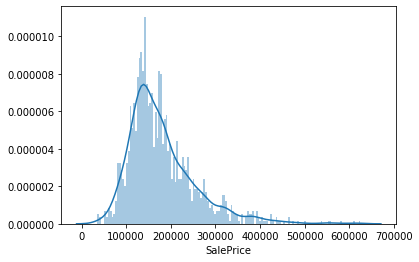

In [38]:
sns.distplot(y, norm_hist=True, bins=146)

We can see that the distribution is right skewed, so let's try and fix it by performing log on the values of y

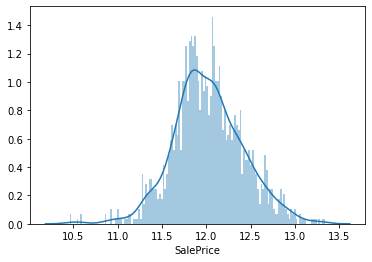

In [39]:
ylog = y.copy()
ylog = np.log(ylog)
sns.distplot(ylog, norm_hist=True, bins=146)

In [40]:
def print_model_mean_and_train(model, scores, train_scores):
    print(model, " mean score is:", scores.mean())
    print('Train score for ', model,' is: ', train_scores)

In [41]:
def save_csv(predictions, model_name):
    # Reverse log operation on predictions using exp
    submission['SalePrice'] = np.exp(predictions)
    # Save CSV to path
    submission.to_csv('data/submission_'+model_name+'.csv', index=False)
    return submission.head(20)

In [42]:
def performe_CV(used_model, X, y_data, cv):
    used_model.fit(X, y_data)
    scores = cross_val_score(used_model, X, y_data, cv=cv)
    return used_model, scores

# Lasso vs. LassoCV

We will start by performing Lasso regression and after that we will select the best features based on what Lasso decides

In [43]:
from sklearn.feature_selection import SelectFromModel

We will performe Lasso and LassoCV for comparison

- LassoCV

In [44]:
# Build LassoCV regression model 
# Fit on standarized data
lassoCV, lassoCV_scores = performe_CV(LassoCV(cv=6), train_cleaned, ylog, 8)

# Print Model Mean Score
print_model_mean_and_train('LassoCV', lassoCV_scores, lassoCV.score(train_cleaned, ylog))

# Get best alpha
bestAlphaLasso = lassoCV.alpha_
print("Best Alpha for LassoCV: ", bestAlphaLasso)

LassoCV  mean score is: 0.810863695259286
Train score for  LassoCV  is:  0.8193761432059876
Best Alpha for LassoCV:  1.0106545120360302


- Lasso

In [45]:
# Build Lasoo regression model using best alpha
lasso = Lasso(alpha=bestAlphaLasso, copy_X=True,
                             fit_intercept=True, max_iter=1000, normalize=False,
                             positive=False, precompute=False,
                             random_state=None, selection='cyclic', tol=0.0001,
                             warm_start=False)
   
# Fit on standarized data
lasso, lasso_scores = performe_CV(lasso, train_cleaned, ylog, 8)

# Print Model Mean Score
print_model_mean_and_train('Lasso', lasso_scores, lasso.score(train_cleaned, ylog))

Lasso  mean score is: 0.8114022189394406
Train score for  Lasso  is:  0.8193761432059876


- Print predictions based on the model with the highest mean it this case it was Lasso

In [46]:
pred_lasso = lasso.predict(test_cleand)
pred_lasso

array([11.81356069, 11.96650922, 12.17809618, ..., 12.10723805,
       11.67210281, 12.3642269 ])

- Save predictions to CSV file

In [47]:
save_csv(pred_lasso, 'Lasso')

,Id,SalePrice
1456,1461,135071.653995
1457,1462,157394.270885
1458,1463,194482.249561
1459,1464,189634.275334
1460,1465,164313.031734
1461,1466,168953.975109
1462,1467,172239.735639
1463,1468,155132.764663
1464,1469,178631.551576
1465,1470,133771.666553


- Now we want to get the best features from Lasso or LassoCV

In [48]:
sfm = SelectFromModel(lasso, threshold=0.1)
sfm.fit(train_cleaned, y)
features = sfm.transform(train_cleaned)
feature_idx = sfm.get_support()
feature_name = train_cleaned.columns[feature_idx]
#feature_name = feature_name.drop('Id')
feature_name

D:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 254936235548.44287, tolerance: 855884442.9822603
  positive)


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=246)

In [49]:
# Get a copy of the best features and standardize it 
best_train = train_cleaned[feature_name]

In [50]:
best_test = test_cleand[feature_name]

In [51]:
# Fit train data using the scaler (scale the data)
best_train_s = ss.fit_transform(best_train)
best_test_s = ss.transform(best_test)

# From now on we will only use the best features that lasso or lassoCV decided on 

# Linear Regression 

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
# Create model instance
lm = LinearRegression()
     
# Perform 5-fold cross validation
lm, lm_scores = performe_CV(lm,  best_train, ylog, 10)
print_model_mean_and_train('Linear Regression', lm_scores, lm.score(best_train, ylog))


Linear Regression  mean score is: 0.9087149501772146
Train score for  Linear Regression  is:  0.9472635625346428


In [54]:
pred_lm = lm.predict(best_test)
pred_lm

array([11.68680777, 11.96172524, 12.1188371 , ..., 12.08036841,
       11.62497161, 12.29989776])

In [55]:
save_csv(pred_lm, 'LinearReg')

,Id,SalePrice
1456,1461,118991.550738
1457,1462,156643.098031
1458,1463,183292.240411
1459,1464,202350.269175
1460,1465,193059.679396
1461,1466,171724.197363
1462,1467,176908.704313
1463,1468,162549.691115
1464,1469,197562.990360
1465,1470,118904.565156


# Ridge vs. RidgeCV

We will performe Ridge and RidgeCV for comparison

- RidgeCV

In [56]:
# np.logspace gives us points between specified orders of magnitude on a logarithmic scale. It is base 10.
r_alphas = np.logspace(0, 5, 500)

In [57]:
# Build RidgeCV regression model 
# Fit on standarized data
# best 6, 8

ridgeCV, ridgeCV_scores = performe_CV(RidgeCV(alphas=r_alphas, cv=10), best_train, ylog, 10)
print_model_mean_and_train('RidgeCV', ridgeCV_scores, ridgeCV.score(best_train, ylog))        

# Get best alpha 
bestAlpha = ridgeCV.alpha_
print("Best Alpha for RidgeCV: ", bestAlpha)

RidgeCV  mean score is: 0.9169203926512421
Train score for  RidgeCV  is:  0.938049802844895
Best Alpha for RidgeCV:  9.160598475443708


- Ridge

In [58]:
# Build Ridge regression model using best alpha
ridge = Ridge(alpha=bestAlpha, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1, solver='auto', tol=0.001)

ridge_model, ridge_scores = performe_CV(ridge, best_train, ylog, 9)
print_model_mean_and_train('Ridge', ridge_scores, ridge_model.score(best_train, ylog))

Ridge  mean score is: 0.9177192972889523
Train score for  Ridge  is:  0.938049802844895


- Print predictions based on the model with the highest mean

In [59]:
pred_ridge = ridgeCV.predict(best_test)
pred_ridge

array([11.64260448, 11.96510969, 12.09978586, ..., 12.06741646,
       11.63925831, 12.31324187])

- Use distplot to compare all the outputs of the predictions shown by the models to find the best prediction comparing with ylog.  
- we found from the distplot that the best model prediction was for the Ridge model.

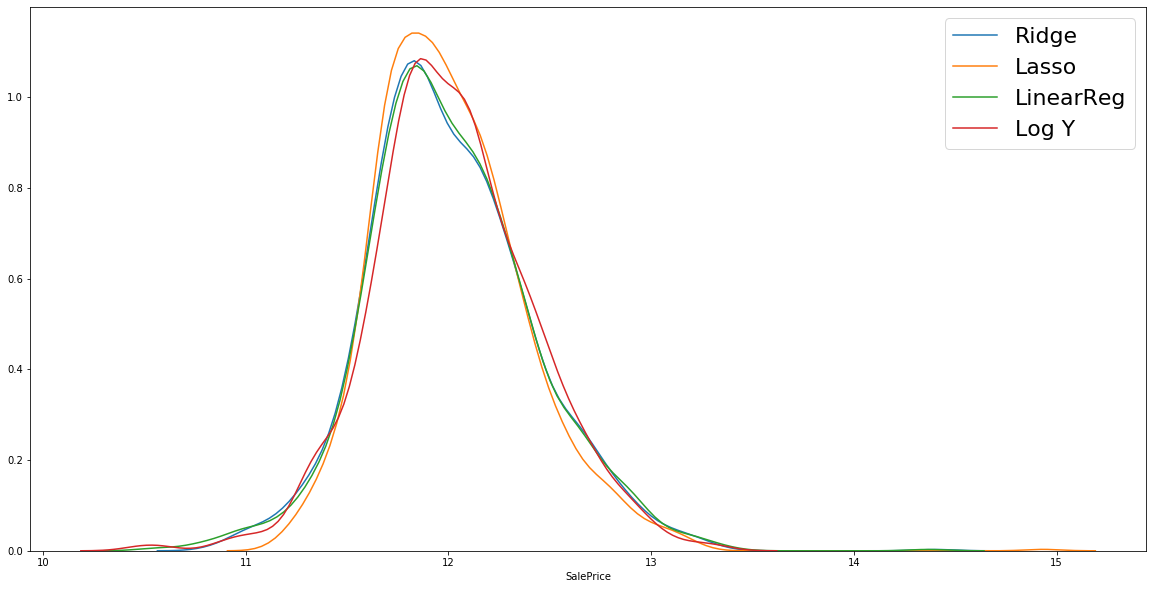

In [60]:
plt.figure(figsize=(20,10))
sns.distplot(pred_ridge, label='Ridge', hist=False)
sns.distplot(pred_lasso, label='Lasso', hist=False)
sns.distplot(pred_lm, label='LinearReg', hist=False)
sns.distplot(ylog, label='Log Y', hist=False)
plt.legend(fontsize='22')

- Save predictions to CSV file

In [127]:
save_csv(pred_ridge, 'Ridge')

,Id,SalePrice
1456,1461,113833.292180
1457,1462,157159.824397
1458,1463,179824.472237
1459,1464,200974.013937
1460,1465,190039.208689
1461,1466,170708.586465
1462,1467,180131.333749
1463,1468,162795.303051
1464,1469,195372.665124
1465,1470,116267.731403


# ElasticNet

In [128]:
# Creating l1_ratio points to try and get optimal ratio 
l1_ratios = np.linspace(0.01, 1.0, 5)

# Build ElasticNetCV regression model
elasticCV = ElasticNetCV(l1_ratio=[.1, .5, .7,
    .9, .95, .99, 1], n_alphas=600, cv=5)

# Fit on standarized data
elasticCV, elasticCV_scores = performe_CV(elasticCV, best_train, ylog, 8)
print_model_mean_and_train('ElasticNetCV', elasticCV_scores, elasticCV.score(best_train, ylog))


# Getting best alpha and optimal ratio
bestAlphaElastic = elasticCV.alpha_
optimall1 = elasticCV.l1_ratio_

print("Best Alpha for ElasticNetCV: ", bestAlphaElastic)
print("Optimal l1_ratio for ElasticNetCV: ", optimall1)

ElasticNetCV  mean score is: 0.8124116822290525
Train score for  ElasticNetCV  is:  0.8193623412630766
Best Alpha for ElasticNetCV:  1.0106545120360302
Optimal l1_ratio for ElasticNetCV:  1.0


In [129]:
elasticNet = ElasticNet(alpha=bestAlphaElastic, l1_ratio=optimall1, random_state=1)

# Fit on standarized data
elastic, elastic_scores = performe_CV(elasticNet, best_train, ylog, 9)
print_model_mean_and_train('ElasticNet', elastic_scores, elastic.score(best_train, ylog))

ElasticNet  mean score is: 0.8121243628720496
Train score for  ElasticNet  is:  0.8193623412630766


In [130]:
pred_elastic = elastic.predict(best_test)
pred_elastic

array([11.81352202, 11.98045383, 12.17801797, ..., 12.10715244,
       11.67282289, 12.36416709])

In [131]:
save_csv(pred_elastic, 'elastic')

,Id,SalePrice
1456,1461,135066.430627
1457,1462,159604.448136
1458,1463,194467.040947
1459,1464,189623.915838
1460,1465,164309.548304
1461,1466,168944.049922
1462,1467,172329.129230
1463,1468,155124.089628
1464,1469,178625.202951
1465,1470,133765.559872


In [133]:
avg_pred = (pred_ridge+pred_lm)/2
save_csv(avg_pred, 'avg')

,Id,SalePrice
1456,1461,116383.847514
1457,1462,156901.248496
1458,1463,181550.076830
1459,1464,201660.967511
1460,1465,191543.490367
1461,1466,171215.638870
1462,1467,178512.747051
1463,1468,162672.450728
1464,1469,196464.775358
1465,1470,117578.756772


# Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Build LassoCV regression model and letting it choose best alpha
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = {'alpha': list(x / 10 for x in range(0, 1000)),
                    'fit_intercept': [True,False], 
                    'normalize' :[False, True]}
n_folds = 5

clf = GridSearchCV(ridge, tuned_parameters, cv=n_folds)
clf.fit(best_train_s, ylog)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

In [ ]:
gs_pred = clf.predict(best_test_s)
gs_pred

In [ ]:
best = clf.best_estimator_
best

In [ ]:
clf.best_params_

In [ ]:
submission.to_csv('../linear_predictors/data/submission_lasso.csv', index=False)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()

rf, rf_score = performe_CV(rf, best_train_s, ylog, 7)
print_model_mean_and_train('RF', rf_score, rf.score(best_train_s, ylog))

In [ ]:
pred_rf = rf.predict(best_test_s)
pred_rf

In [ ]:
save_csv(pred_rf, 'RF')